In [1]:
import os
from collections import namedtuple

In [2]:
# Just run this cell (it's just to make certain text red)
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

## CSV: Analysing cereal.csv dataset
### Problem 1: Write a function that *reads* in the *cereal.csv* file and stores the data as a variable. 

In [3]:
# Function to read csv file
import csv

def csv_reader(path):
    f = open(path, encoding = 'utf-8')
    r = csv.DictReader(f)
    reader = list(r)
    f.close()
    for i in reader:
        for j in i.keys():
            if j not in ('name', 'mfr', 'type'):
                i[j] = float(i[j])
    return reader

### Problem 2: What is the carbohydrate content in the cereal named "Cheerios"?

In [4]:
dataset = csv_reader('cereal.csv')
carbo = ''
for i in dataset:
    if i['name'] == 'Cheerios':
        carbo = i['carbo']
        
carbo

17.0

### Problem 3: What is the cereal with the highest rating?

In [5]:
def rank(data):
    return data['rating']

dataset.sort(key=rank, reverse=True)
highest_rating = dict()
highest_rating[dataset[0]['name']] = dataset[0]['rating']

highest_rating

{'All-Bran with Extra Fiber': 93.704912}

### Problem 4: Write a function that computes the mininum, maximum, and average for a given numerical column of the cereal data and returns these data as a dictionary. Report the basic statistics for the fat column.

In [6]:
def find_stats(col_name):
    stat = {'min': 999, 'max': 0, 'mean': 0}
    for i in dataset:
        stat['mean'] += i[col_name]
        if stat['min'] > i[col_name]:
            stat['min'] = i[col_name]
        if stat['max'] < i[col_name]:
            stat['max'] = i[col_name]
    stat['mean'] = stat['mean']/len(dataset)
    return stat

result = find_stats('fat')
result

{'min': 0.0, 'max': 5.0, 'mean': 1.0129870129870129}

### Problem 5: Find the *difference* between the *average sugar content* of all cereals that are rated below 30 and the ones above 50.

In [7]:
avg_sugar_below_30 = 0 
avg_sugar_above_50 = 0
count_30 = 0
count_50 = 0

for i in dataset:
    if i['rating'] < 30:
        avg_sugar_below_30 += i['sugars']
        count_30 += 1
    elif i['rating'] > 50:
        avg_sugar_above_50 += i['sugars']
        count_50 += 1

avg_sugar_below_30 /= count_30
avg_sugar_above_50 /= count_50

avg_sugar_below_30 - avg_sugar_above_50

8.783882783882785

### Problem 6: What is the product name in the cereal data that has the third highest rating?

In [8]:
dataset[2]['name']

'Shredded Wheat spoon size'

### Problem 7: What are *product names* that meet the following criteria:
1. *2 ≤ fat ≤ 5*
2. *rating ≥ 30*
3. *100 ≤ sodium ≤ 200*

In [9]:
product = list()
for i in dataset:
    if 2 <= i['fat'] <= 5 and i['rating'] >= 30 and 100 <= i['sodium'] <= 200:
        product.append(i['name'])
product.sort()

product

['Almond Delight',
 'Clusters',
 "Cracklin' Oat Bran",
 'Fruit & Fibre Dates; Walnuts; and Oats',
 'Life',
 'Muesli Raisins; Peaches; & Pecans',
 'Mueslix Crispy Blend',
 'Oatmeal Raisin Crisp',
 'Raisin Nut Bran']

### Problem 8: Write a function *find_word(keyword)* that returns a list of product names that have *keyword* in the product name.
- Keyword match:
  - should be *case insensitive*
  - should be *complete match (not a substring match)*, with the exception of "'" and "-"
- *Order the list* with the highest rated cereal first and the lowest rated cereal last
- The match result should not consider substring match:
  - Let's say keyword is "Apple", and product names are ["Apple pie", "Apple's seed", "Applewatch", "apple-pay", "apples"].
  - In this example only "Apple pie", "Apple's seed", and "apple-pay" matches with keyword. 
  - "Applewatch" and "apples" are NOT qualified since there are additional letters concatenated to the keyword.

In [10]:
import copy

def rank_rate(data_with_key):
    return data_with_key[1]

def find_word(keyword):
    list_ = list()
    keyword = keyword.upper()
    for i in dataset:
        break1 = i['name'].upper()
        break1 = break1.split(" ")
        temp1 = copy.deepcopy(break1)
        for j in temp1:
            break2 = j
            break1.remove(j)
            break2 = break2.split("-")
            temp2 = copy.deepcopy(break2)
            for k in temp2:
                break3 = k
                break2.remove(k)
                break3 = break3.split("'")
                break2 += break3
            break1 += break2
        for l in break1:
            if keyword == l:
                list_.append([i['name'], i['rating']])
        list_.sort(key=rank_rate, reverse = True)
        list_name = list()
        for i in list_:
            list_name.append(i[0])
    return list_name

# Result of find_word("Wheat")?
find_word("Wheat")

["Shredded Wheat'n'Bran",
 'Shredded Wheat spoon size',
 'Shredded Wheat',
 'Cream of Wheat (Quick)',
 'Puffed Wheat',
 'Nutri-grain Wheat',
 'Frosted Mini-Wheat',
 'Wheat Chex',
 'Crispy Wheat & Raisins']

## HTML: Analysing netflix_titles.html (to be converted to Python data structure) dataset

### Problem 1: Download and parse netflix_titles.html and write the data into a list-of-lists or list-of-dictionaries

In [11]:
import requests
from bs4 import BeautifulSoup

def download(filename, url):
    # Do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")

    # Download the file from URL and save it in `filename`
    r = requests.get(url)
    r.raise_for_status()
    data = r.text
    
    f = open(filename, "w", encoding="utf-8")
    f.write(data)
    f.close()

    return (str(filename) + " created!")

# Download
download("netflix_titles.html", \
         "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/final/netflix_titles.html")

def parse_html_contents(html_file):
    # To store the parsed data
    netflix_data = []
    
    # Open and read the html file
    f = open(html_file, encoding="utf-8")
    html = f.read()
    f.close()
    
    # Create a BeautifulSoup type
    page = BeautifulSoup(html, 'html.parser')
    
    # Find the dataset table
    table = page.find("table")
                
    # Find the rows in the table. Hint: separate your header versus data processing here.
    row = table.find_all("tr")
    
    # Find data for header row: you can generate a list of str here (see above output for reference)
    header_html = row.pop(0)
    header = []
    for i in header_html.find_all("td"):
        header.append(i.get_text())
    
    # Find data for the remaining rows:
    # To store this dataset, choose between list-of-lists or list-of-dictionaries
    for i in row:
        temp = dict()
        h = iter(header)
        for j in i.find_all("td"):
            temp[next(h)] = j.get_text()
        netflix_data.append(temp)
    
    
    return netflix_data 
    # If you want to return header data also, change the above line to something like this:
    # return netflix_header, netflix_data
    
netflix_data = parse_html_contents("netflix_titles.html") #Do not change these lines
top_3_titles = []
for row in netflix_data[:3]:
    # Retrieve top 3 titles from your data structure (see above output for reference)
    top_3_titles.append(row['title'])

top_3_titles

['Norm of the North: King Sized Adventure',
 'Jandino: Whatever it Takes',
 'Transformers Prime']

### Problem 2: List the first 10 TV shows' titles in the dataset.

In [12]:
from collections import defaultdict

# Function to bucketize data based on given key
def bucketize_movie(dataset, key):
    data = defaultdict(list)
    for i in dataset:
        data[i[key]].append(i)
    return dict(data)

buck = bucketize_movie(netflix_data, 'type')
tv = []
for i in buck['TV Show'][:10]:
    tv.append(i['title'])
tv

['Transformers Prime',
 'Transformers: Robots in Disguise',
 'Apaches',
 'Fire Chasers',
 'Castle of Stars',
 'First and Last',
 "Archibald's Next Big Thing",
 'The Spy',
 'No Tomorrow',
 'Frequency']

### Problem 3: How many movies released after 2015 (inclusive) are in this dataset?

In [13]:
count = 0
for i in buck['Movie']:
    if int(i['release_year']) >= 2015:
        count += 1
        
count

55

## JSON: Analysing the movies data in the data folder.

### Problem 1: What is the *average rating* for the movie with id *34*?

In [14]:
import json

# Iterate through every files in the directory
path = os.listdir(os.path.join('data', 'users'))
for i in range(len(path)):
    path[i] = os.path.join('data', 'users', path[i])

id_ = defaultdict(list)
for i in path:
    f = open(i, 'r', encoding = 'utf-8')
    json_dict = json.loads(f.read())
    for i in json_dict.keys():
        id_[i].append(json_dict[i])
    f.close()
    
id_ = dict(id_)
for i in id_.keys():
    for j in range(len(id_[i])):
        id_[i][j] = float(id_[i][j])

avg = 0
for i in id_['34']:
    avg += i
    
avg = avg/len(id_['34'])

avg

4.333333333333333

### Problem 2: What is the *minimum rating* for the movie *Batman (1989)*?

In [15]:
path = os.path.join('data', 'movies.csv')
f = open(path, 'r', encoding = 'utf-8')
movies = csv.DictReader(f)
movies = list(movies)
f.close()

id_batman = ''
for i in movies:
    if i['title'] == 'Batman (1989)':
        id_batman = i['movieId']
        
min(id_[id_batman])

3.0

## SQLite Database: Analysing countries.db - same dataset as P10 (q24 to q27).

In [16]:
import sqlite3
import pandas as pd
from pandas import DataFrame

conn = sqlite3.connect('countries.db')
capitals = pd.read_sql("SELECT * FROM capitals", conn)
countries = pd.read_sql("SELECT * FROM countries", conn)

### Problem 1: What is the *capital* of *Namibia*?

In [17]:
str(list(capitals[capitals['country'] == 'Namibia']['capital'])[0])

'Windhoek'

### Problem 2: What is the distance between every pair of countries in the South American continent?

In [18]:
import math

# Calculate the Euclidean distance with latitude and longtitude as coordinates
def dist(lat1, lon1, lat2, lon2):
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * (math.sin(dlon/2)**2)
    c = 2 * math.asin(min(1,a**0.5))
    d = 3956 * c
    return d

In [19]:
#Collect data about South America countries
sa = []
for i in range(len(countries['continent'])):
    if countries['continent'][i] == 'South America':
        sa.append(countries['country'][i])
    
#Collect the index of each country's capital
index = []
for i in sa:
    index.append([i, 0])
for i in range(len(capitals['country'])):
    for j in index:
        if j[0] == capitals['country'][i]:
            j[1] = i
            break

#Calculate the distance matrix
_dist = dict()
for i in index:
    _dist[i[0]] = dict()
    for j in index:
        if j[0] != i[0]:
            _dist[i[0]][j[0]] = dist(capitals['latitude'][i[1]], capitals['longitude'][i[1]], capitals['latitude'][j[1]], capitals['longitude'][j[1]])
        else:
            _dist[i[0]][j[0]] = math.nan

temp = DataFrame(_dist)
temp

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Chile,NaN,2897.553095,2636.644599,2895.810776,1869.737031,1180.741903,3043.657689,690.784168,1531.480189,2350.207788,833.403262,963.635535
Guyana,2897.553095,NaN,1105.066312,215.336336,1709.071018,1747.772670,646.969843,2857.520462,1837.860149,1483.193753,2878.638295,2214.288286
Colombia,2636.644599,1105.066312,NaN,1303.405134,2275.516286,1512.119255,639.361118,2885.355610,1167.505359,451.004119,2962.230943,2337.615967
Suriname,2895.810776,215.336336,1303.405134,NaN,1572.674232,1778.772975,861.456786,2799.886429,1944.750017,1661.699022,2809.744412,2153.855447
Brazil,1869.737031,1709.071018,2275.516286,1572.674232,NaN,1342.297074,2228.690679,1459.139733,1967.770515,2344.584922,1412.096335,908.185710
Bolivia,1180.741903,1747.772670,1512.119255,1778.772975,1342.297074,NaN,1865.131181,1379.455701,669.926372,1326.758656,1467.253638,906.799256
Venezuela,3043.657689,646.969843,639.361118,861.456786,2228.690679,1865.131181,NaN,3157.624051,1705.418003,1088.064117,3207.352176,2544.799572
Argentina,690.784168,2857.520462,2885.355610,2799.886429,1459.139733,1379.455701,3157.624051,NaN,1936.465790,2696.149591,143.069943,646.036441
Peru,1531.480189,1837.860149,1167.505359,1944.750017,1967.770515,669.926372,1705.418003,1936.465790,NaN,823.054491,2046.571589,1558.635236
Ecuador,2350.207788,1483.193753,451.004119,1661.699022,2344.584922,1326.758656,1088.064117,2696.149591,823.054491,NaN,2791.196721,2218.650964


### Problem 3: What is the most central country in the South American continent?

In [20]:
temp.mean().sort_values().index[0]

'Bolivia'

### Problem 4: How close is each country in South America to it's nearest neighbor?

In [21]:
nearest = {'nearest': {}, 'distance':{}}
for i in temp.index:
    nearest['nearest'][i] = temp[i].idxmin()
    nearest['distance'][i] = temp[i].min()

DataFrame(nearest)

,nearest,distance
Chile,Argentina,690.784168
Guyana,Suriname,215.336336
Colombia,Ecuador,451.004119
Suriname,Guyana,215.336336
Brazil,Paraguay,908.185710
Bolivia,Peru,669.926372
Venezuela,Colombia,639.361118
Argentina,Uruguay,143.069943
Peru,Bolivia,669.926372
Ecuador,Colombia,451.004119


### Problem 5: What are the top 8 countries that have the largest real GDP? (answer with a plot)

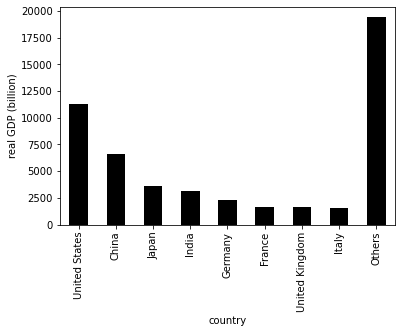

In [22]:
cont = pd.read_sql("""
SELECT country, "gdp-per-capita" * population / 1000000000.0 as "real GDP (billion)"
FROM countries
ORDER BY "real GDP (billion)" DESC

""", conn)

temp = cont.set_index('country')[:8]["real GDP (billion)"]
temp["Others"] = cont.set_index('country')[8:]["real GDP (billion)"].sum()

ax = temp.plot.bar(color='0')
ax.set_xlabel('country')
ax.set_ylabel("real GDP (billion)")

#Q22
ax

### Problem 6: What is the relationship between GDP per capita and inverse of infant-mortality?

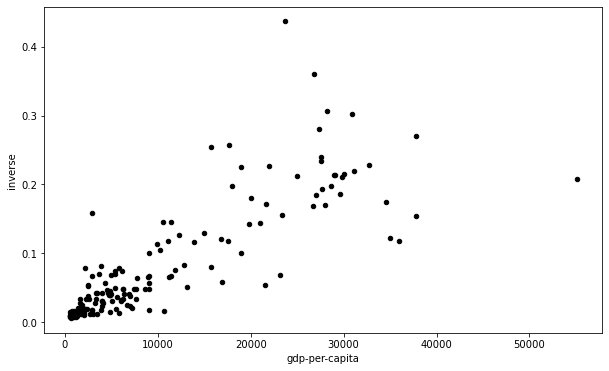

In [23]:
cont = pd.read_sql("""
SELECT "gdp-per-capita", 1 / "infant-mortality" as "inverse"
FROM countries
""", conn)

gdp_net = cont.set_index("gdp-per-capita")["inverse"]
#Q27
ax = cont.plot.scatter(x="gdp-per-capita", y="inverse", c='black', figsize=(10,6))
ax

### Problem 7: fit a y = m * x + n line to the scatter plot in question 27 using the least-squares method; what are the coefficients m and n?

In [24]:
import numpy as np

cont["1"] = 1
res = np.linalg.lstsq(cont[["gdp-per-capita", "1"]], cont["inverse"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
#Q28
(m, n)

(6.482983154848297e-06, 0.013237849092120857)

### Problem 8: When gdp-per-capita = 50000, what is the expected value for infant-mortality?

In [25]:
1/(m*50000+n)

2.963955279079342

### Problem 9: plot the regression line to the scatter plot

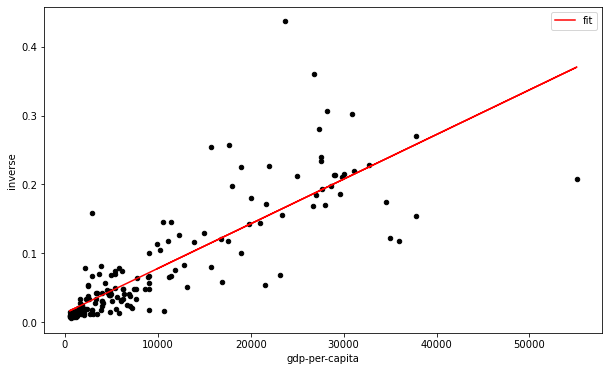

In [26]:
ax = cont.plot.scatter(x="gdp-per-capita", y="inverse", c='black', figsize=(10,6))

cont["fit"] = cont["gdp-per-capita"] * m + n
#Q30
cont.plot.line(x="gdp-per-capita", y='fit', c='red', ax=ax, figsize=(10,6))

### Problem 10: What is the *population* of *each continent*?

In [27]:
cont = pd.read_sql("""
SELECT continent, SUM(population) as "population" 
FROM countries 
GROUP BY continent
ORDER BY "population" DESC
""", conn)

cont

,continent,population
0,Asia,3739902863
1,Africa,807299195
2,Europe,792053486
3,North America,515041558
4,South America,375441666
5,Australia,32163025


### Problem 11: *Plot the total population* of each continent.

Text(0.5, 0, 'continent')

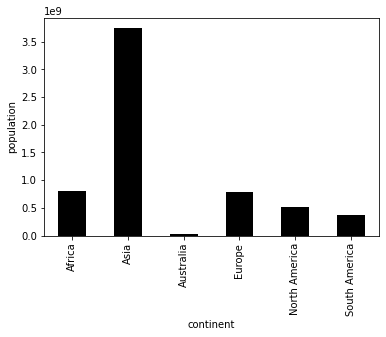

In [28]:
ax = cont.sort_values(by=['continent']).set_index('continent')['population'].plot.bar(color = '0')
ax.set_ylabel('population')
ax.set_xlabel('continent')

### Problem 13: What is the *population density (population / area)* of all the *top 7* most dense *countries in Europe*?

In [29]:
density = pd.read_sql("""
SELECT country, continent,  population / area as "population density"
FROM countries
ORDER BY "population density" DESC
""", conn)

d = density[density['continent'] == 'Europe'][['country', 'population density']].set_index('country')[:7].reset_index()
d

,country,population density
0,Monaco,16271
1,Malta,1266
2,San Marino,479
3,Netherlands,397
4,Belgium,339
5,United Kingdom,247
6,Germany,230


In [30]:
conn.close()